In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sympy.solvers import solve
from sympy import Symbol

In [7]:
class ITC_Simulation():
    
    '''
    
    Usage: This class is defined to input reactions and reactions parameters and simulate ITC experiments for that reaction
    
    ITC experiments: are used to determine thermodynamic parameters of molecules binding in a solution. It measures heat absorbed or liberated when binding ligand and receptor molecues interact

    In this module we will first implement the most basic reaction: R + L ----> RL
    
    Input: Reaction
    Output: ITC Curve at different L/R ratio
        
    '''
    
    def __init__(self):
        
        self.reaction = 'R + L -> RL'
        self.LRratio = [1e-3]
        [self.LRratio.append(ele) for ele in np.linspace(0.1 , 1.4 , 140)]
        self.RTotal = 1e-3
        self.Model = {}
        self.dH = -1
        self.ITC_curve = []
        
        pass
    
    def model(self):
        
        kon = float(input("Enter Kon of the reaction: "))
        koff = float(input("Enter Koff of the reaction: "))
        
        Kd = koff / kon
        RL = Symbol('RL')
        
        
        self.Model['kon'] = kon
        self.Model['koff'] = koff
        self.Model['Kd'] = 1.0/1e5
        self.Model['RL'] = RL
    
    
    def solve_equations(self , ratio):
        
        RL = self.Model['RL']
        Ltotal = ratio * self.RTotal
        
        
        RL_conc = solve(str(RL ** 2 - RL * (self.Model['Kd'] + Ltotal + self.RTotal) + self.RTotal * Ltotal))
        
        
        for ele in RL_conc:
            
            if ele >= 0  and ele <= self.RTotal and ele <= Ltotal:
                
                return ele
        
        
        
    def perform_simulation(self):
        
        RL_conc = self.solve_equations(self.LRratio[0])
        
        old_mole_fraction = RL_conc / self.RTotal
        
        for ratio in self.LRratio[1:]:
            
            mole_fraction = self.solve_equations(ratio) / self.RTotal
            
            diff = mole_fraction - old_mole_fraction
            
            old_mole_fraction = mole_fraction
            
            self.ITC_curve.append(diff * self.dH)
            
            
    
    def display(self):
        
        plt.figure(dpi = 150)
        plt.plot(self.LRratio[2:] , self.ITC_curve[1:])
        plt.xlabel("Ratio L:R")
        plt.ylabel("Heat released")
    
    def save_results(self):
        
        pass
        

In [8]:
g = ITC_Simulation()

In [9]:
g.model()

Enter Kon of the reaction: 10
Enter Koff of the reaction: 10


In [10]:
g.perform_simulation()

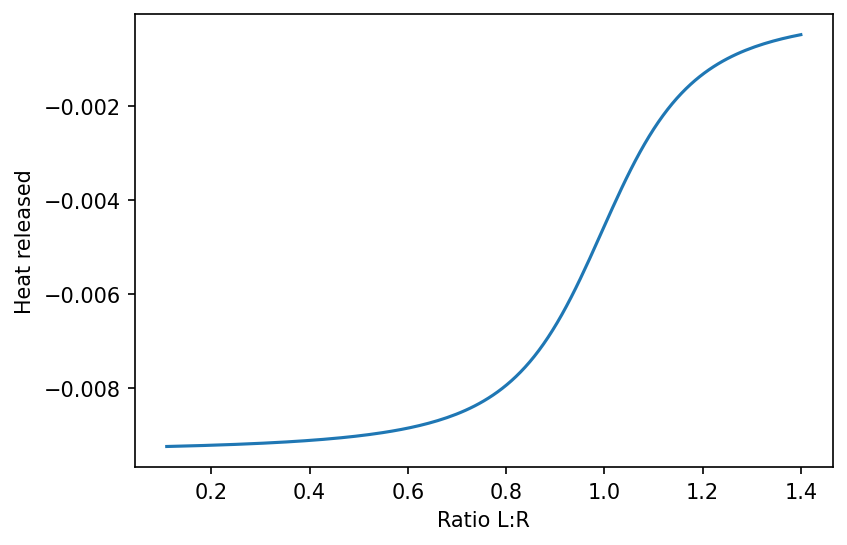

In [11]:
g.display()